In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True) # Remove null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop(["median_house_value"], axis=1) # Data without the column whose values we want to predict
y = data["median_house_value"] # The column whose values we want to predict

In [10]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [11]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Split the data into training and testing datasets

In [13]:
train_data = X_train.join(y_train)

In [14]:
train_data # Training related data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9785,-121.32,35.95,31.0,372.0,68.0,479.0,67.0,3.5547,NEAR OCEAN,200000.0
16861,-122.42,37.63,46.0,66.0,11.0,30.0,12.0,2.3750,NEAR OCEAN,275000.0
17112,-122.20,37.47,40.0,2959.0,389.0,985.0,365.0,9.9025,NEAR BAY,500001.0
15587,-116.61,33.04,11.0,2522.0,538.0,616.0,269.0,3.8750,INLAND,198100.0
10119,-117.92,33.94,30.0,2506.0,394.0,1255.0,421.0,4.7813,<1H OCEAN,198200.0
...,...,...,...,...,...,...,...,...,...,...
15815,-122.42,37.76,52.0,2088.0,487.0,1082.0,488.0,2.6803,NEAR BAY,490000.0
7881,-118.12,33.87,21.0,3764.0,1081.0,1919.0,977.0,2.5057,<1H OCEAN,156300.0
13431,-117.42,34.10,18.0,3977.0,809.0,2231.0,742.0,4.1399,INLAND,115400.0
17536,-121.88,37.35,49.0,1728.0,350.0,1146.0,391.0,3.5781,<1H OCEAN,193000.0


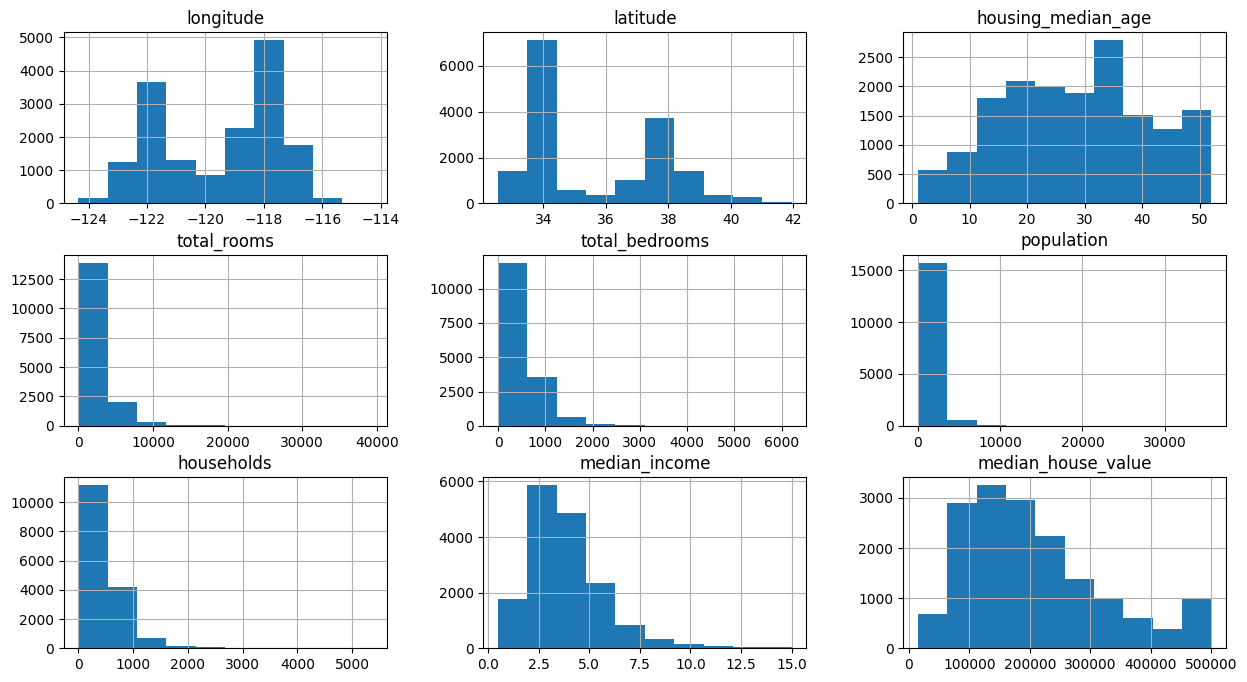

In [17]:
train_data.hist(figsize=(15, 8));

In [34]:
train_data.drop(["ocean_proximity"], axis=1).corr() # Looking for correlation between the data; dropped a troublesome column, temporarily

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925038,-0.109460,0.048331,0.073767,0.106645,0.059793,-0.021479,-0.051213
latitude,-0.925038,1.000000,0.012441,-0.038522,-0.069325,-0.113494,-0.073171,-0.075393,-0.139111
housing_median_age,-0.109460,0.012441,1.000000,-0.363471,-0.325661,-0.298217,-0.307296,-0.119142,0.101908
total_rooms,0.048331,-0.038522,-0.363471,1.000000,0.931433,0.854598,0.920059,0.201350,0.135898
total_bedrooms,0.073767,-0.069325,-0.325661,0.931433,1.000000,0.875588,0.979995,-0.004787,0.051573
population,0.106645,-0.113494,-0.298217,0.854598,0.875588,1.000000,0.905079,0.006793,-0.024515
households,0.059793,-0.073171,-0.307296,0.920059,0.979995,0.905079,1.000000,0.015512,0.066642
median_income,-0.021479,-0.075393,-0.119142,0.201350,-0.004787,0.006793,0.015512,1.000000,0.689685
median_house_value,-0.051213,-0.139111,0.101908,0.135898,0.051573,-0.024515,0.066642,0.689685,1.000000


<Axes: >

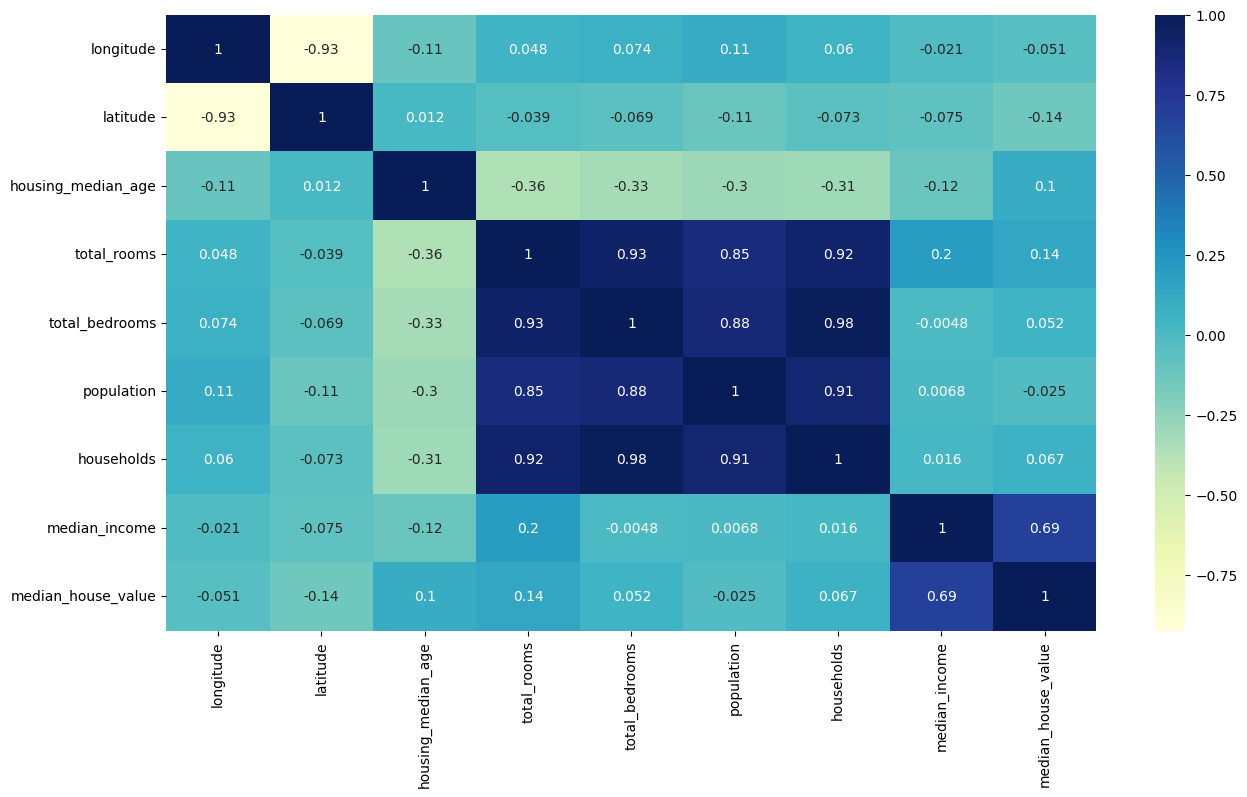

In [35]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.drop(["ocean_proximity"], axis=1).corr(), annot=True, cmap="YlGnBu") # Same as before but pretty